# Maximizing Revenue for Taxi Cab Drivers Through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.


## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.


## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pq.read_table(r"D:\UNH Materials\Projects\Maximizing-revenue\data\yellow_tripdata_2020-01.parquet")
df= df.to_pandas()

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


# Exploratory Data Analysis

In [5]:
df.shape

(6405008, 19)

In [6]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [7]:
# Calculate duration

df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None,4.800000
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None,7.416667
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None,6.183333
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None,4.850000
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None,2.300000


In [9]:
df = df[['passenger_count', 'payment_type', 'total_amount', 'trip_distance', 'duration']]

In [10]:
# Check missing values
df.isnull().sum()

passenger_count    65441
payment_type           0
total_amount           0
trip_distance          0
duration               0
dtype: int64

In [11]:
df.shape

(6405008, 5)

In [12]:
# Percentage of missing values

(df.isnull().sum()[0] / df.shape[0]) * 100

1.021716132126611

Just 1% of missing values, easily dropable

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(6339567, 5)

In [15]:
# Change data dtype of passenger count column

df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [16]:
df.head()

,passenger_count,payment_type,total_amount,trip_distance,duration
0,1,1,11.27,1.2,4.800000
1,1,1,12.30,1.2,7.416667
2,1,1,10.80,0.6,6.183333
3,1,1,8.16,0.8,4.850000
4,1,2,4.80,0.0,2.300000


In [17]:
# Check for duplicate values

df[df.duplicated()]

,passenger_count,payment_type,total_amount,trip_distance,duration
2056,1,2,10.80,0.00,0.000000
3729,1,2,11.30,1.50,7.166667
5172,1,2,7.80,0.20,3.666667
5735,1,2,9.30,0.80,5.116667
7483,1,1,12.35,1.20,6.550000
...,...,...,...,...,...
6339557,1,1,10.56,0.74,4.183333
6339558,1,2,11.80,1.63,8.800000
6339559,1,1,14.76,1.81,8.016667
6339562,1,1,17.76,2.10,14.233333


In [18]:
df[df.duplicated()].shape[0] / df.shape[0] * 100

28.189149195836244

28% data is duplicated/reduntant 

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.shape

(4552497, 5)

In [34]:
color_palette = ['#f6b01f', '#f3a709', '#db9708', '#c48707', '#ac7706', '#956605', '#7d5604', '#664603']

1    0.648233
2    0.175584
3    0.052069
5    0.047670
6    0.028335
4    0.026260
0    0.021835
7    0.000006
9    0.000004
8    0.000004
Name: passenger_count, dtype: float64

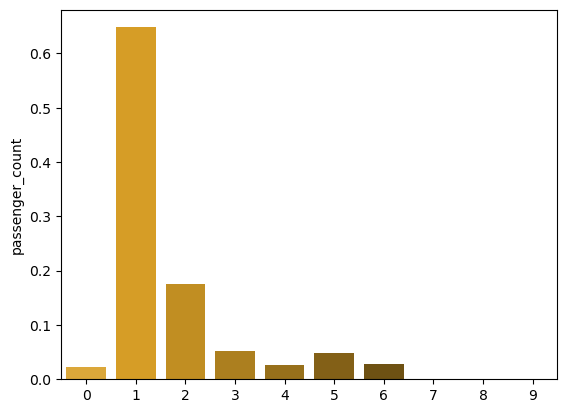

In [37]:
# Distribution of passenger_counts
x = df['passenger_count'].value_counts().index
y = df['passenger_count'].value_counts(normalize=True)
sns.barplot(data = df, x = x, y = y, palette = color_palette)
df['passenger_count'].value_counts(normalize=True)

1    7.511291e-01
2    2.387808e-01
3    6.318950e-03
4    3.770898e-03
5    2.196597e-07
Name: payment_type, dtype: float64

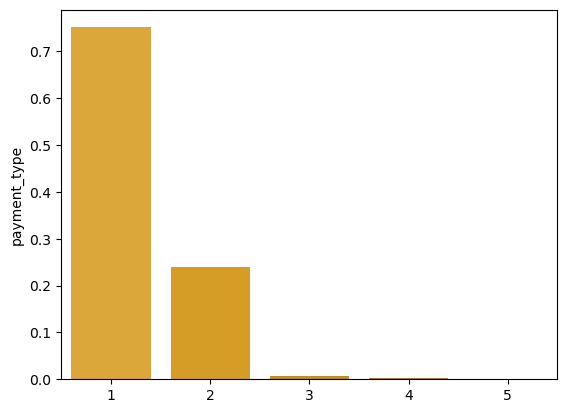

In [36]:
# Distribution of passenger_counts
x = df['payment_type'].value_counts().index
y = df['payment_type'].value_counts(normalize=True)
sns.barplot(data = df, x = x, y = y, palette = color_palette)
df['payment_type'].value_counts(normalize=True)

We only need payment type 1 and 2, so we will filter the other three payment types

In [38]:
df = df[df['payment_type'] < 3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 7)]

In [39]:
df.shape

(4409464, 5)

In [40]:
# Change variable name
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)

In [97]:
df.head()

,passenger_count,payment_type,total_amount,trip_distance,duration
0,1,Card,11.27,1.2,4.800000
1,1,Card,12.30,1.2,7.416667
2,1,Card,10.80,0.6,6.183333
3,1,Card,8.16,0.8,4.850000
4,1,Cash,4.80,0.0,2.300000


In [41]:
# Analyse numerical data

df.describe()

,passenger_count,total_amount,trip_distance,duration
count,4.409464e+06,4.409464e+06,4.409464e+06,4.409464e+06
mean,1.709474e+00,2.096310e+01,3.495086e+00,1.908763e+01
std,1.283445e+00,1.624071e+01,4.250487e+00,7.571757e+01
min,1.000000e+00,-5.003000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,1.225000e+01,1.140000e+00,7.600000e+00
50%,1.000000e+00,1.596000e+01,2.000000e+00,1.255000e+01
75%,2.000000e+00,2.280000e+01,3.760000e+00,1.948333e+01
max,6.000000e+00,4.268300e+03,2.628800e+02,8.525117e+03


An interesting thing to notice, if you look at the minimum values for total_amount, trip_distance, and duration, they are in negative. Clearly these values cannot be in negatives. There are some outliers in both the directions of the data

In [42]:
# Remove rows with negative values
df = df[df['total_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]

In [43]:
df.describe()

,passenger_count,total_amount,trip_distance,duration
count,4.369127e+06,4.369127e+06,4.369127e+06,4.369127e+06
mean,1.712719e+00,2.082489e+01,3.524552e+00,1.910334e+01
std,1.286074e+00,1.572338e+01,4.255728e+00,7.574926e+01
min,1.000000e+00,3.000000e-01,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.225000e+01,1.160000e+00,7.650000e+00
50%,1.000000e+00,1.596000e+01,2.000000e+00,1.256667e+01
75%,2.000000e+00,2.256000e+01,3.800000e+00,1.946667e+01
max,6.000000e+00,4.268300e+03,2.628800e+02,8.525117e+03


## Remove Outliers

First we will visualize the distribution for the data with outliers

<function matplotlib.pyplot.show(close=None, block=None)>

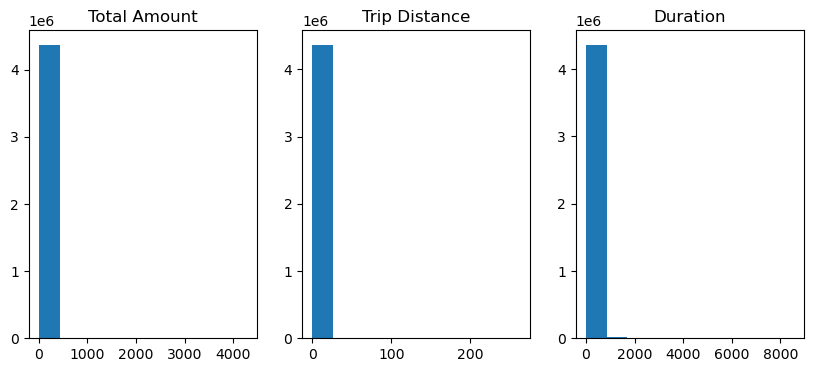

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].hist(df['total_amount'], color = )
ax[1].hist(df['trip_distance'])
ax[2].hist(df['duration'])

ax[0].set_title('Total Amount')
ax[1].set_title('Trip Distance')
ax[2].set_title('Duration')

plt.show

As we can clearly see the extreme values present in the data. These are the outliers and should be removed for better analysis.

As the data is not normalized, we cannot use z-score. We will use IQR method to remove the outliers

In [102]:
df.shape

(4369127, 5)

In [103]:
# fundction to calculate IQR and remove outliers
columns = ['total_amount', 'trip_distance', 'duration']
for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR - 0.1 # added a bias of 0.1
    upper_bound = q3 + 1.5 * IQR + 0.1 # added a bias of 0.1
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape

(3621642, 5)

As we can see there is a substantial amount of outliers that has been removed. Let's see the distribution again after the outliers removal

<function matplotlib.pyplot.show(close=None, block=None)>

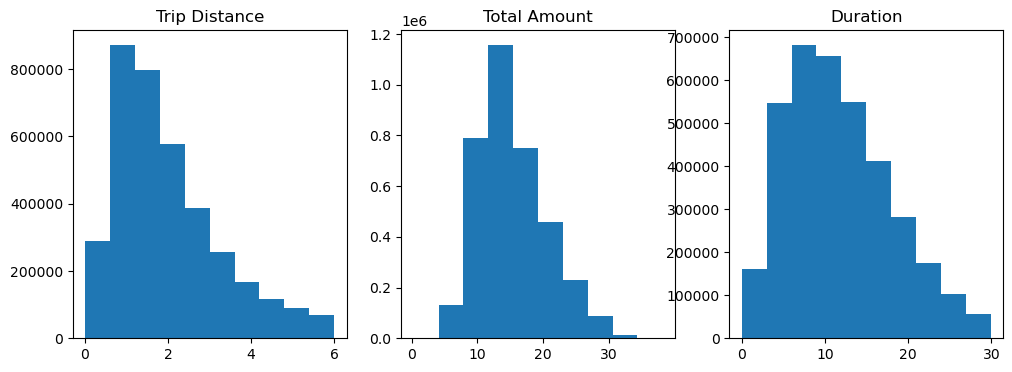

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].hist(df['trip_distance'])
ax[1].hist(df['total_amount'])
ax[2].hist(df['duration'])

ax[0].set_title('Trip Distance')
ax[1].set_title('Total Amount')
ax[2].set_title('Duration')

plt.show

The distribution looks better than before

We're interested in exploring the relationship between payment type and passenger behaviour concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances.

To investigate this, we'll plot histograms to vizualize the distribution of passenger counts playing with either card or cash. This will also provide stakeholders with insights into fare amount ranges associated with different payment methods.

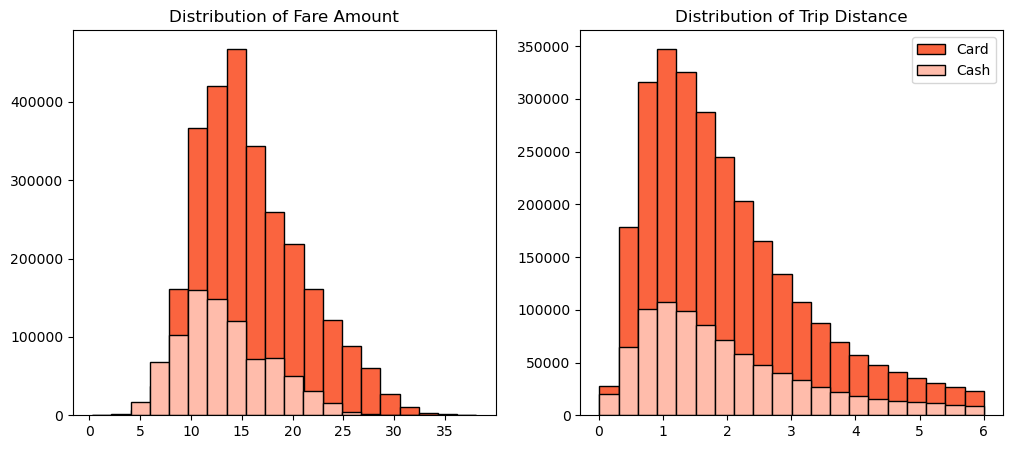

In [112]:
# Distribution of fare amount for different payment types

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)

plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'Card']['total_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['total_amount'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Cash')

plt.legend()
plt.show()

In [113]:
df.groupby('payment_type').agg({'total_amount':['mean', 'std'], 'trip_distance':['mean', 'std']})

total_amount           trip_distance          
                     mean       std          mean       std
payment_type                                               
Card            16.028355  5.134465      2.007505  1.249038
Cash            13.241087  4.444656      1.990515  1.310648

Customers prefer Card when amount or trip distance is more

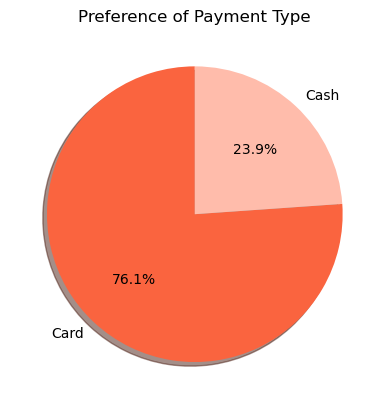

In [116]:
# Distribution of Payment preference 

plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index,
       startangle=90, shadow = True, autopct = '%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

In [118]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [119]:
passenger_count

,payment_type,passenger_count,count
0,Card,1,1818070
1,Card,2,497128
2,Card,3,147742
3,Card,4,69362
4,Card,5,140962
5,Card,6,83174
6,Cash,1,532140
7,Cash,2,169032
8,Cash,3,55354
9,Cash,4,32541


In [121]:
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1818070,50.200158
1,Card,2,497128,13.726591
2,Card,3,147742,4.079420
3,Card,4,69362,1.915209
4,Card,5,140962,3.892212
5,Card,6,83174,2.296583
6,Cash,1,532140,14.693335
7,Cash,2,169032,4.667275
8,Cash,3,55354,1.528423
9,Cash,4,32541,0.898515


In [130]:
pivot_df = passenger_count.pivot_table(index='payment_type', columns = 'passenger_count')['perc'].reset_index()

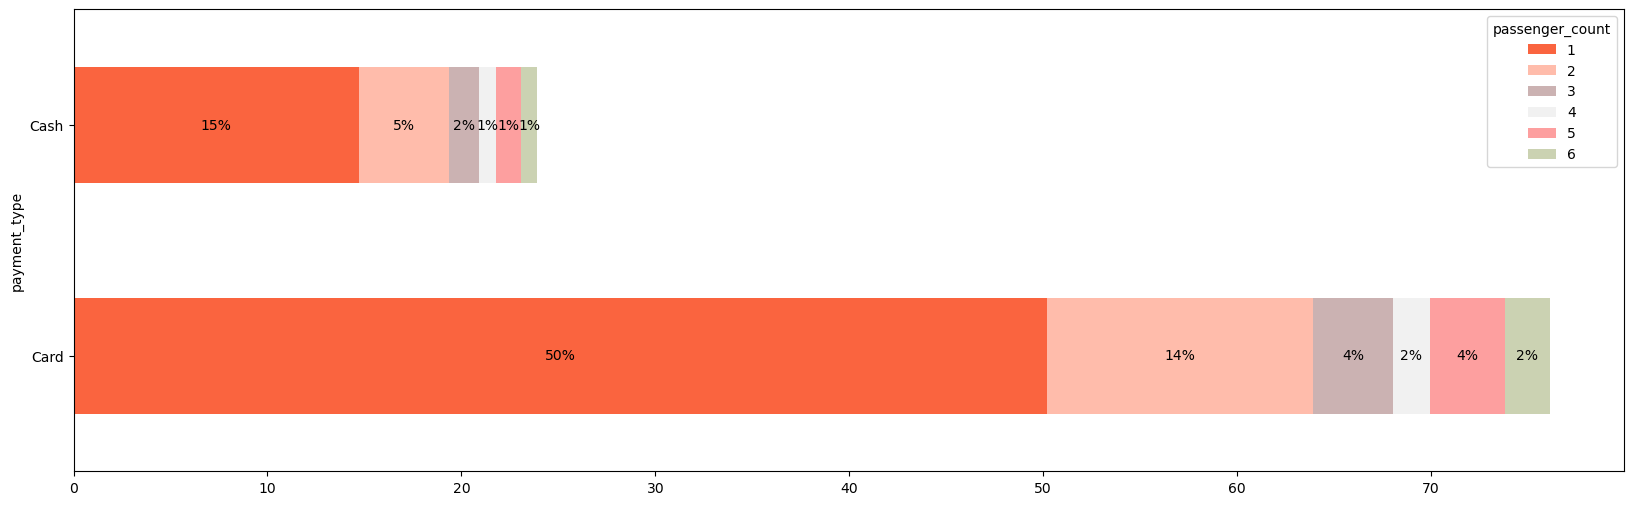

In [143]:
fig, ax = plt.subplots(figsize = (20, 6))
pivot_df.plot(x = 'payment_type', kind='barh', stacked = True, ax = ax, color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F','#CBD2B2'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, '{:.0f}%'.format(width), horizontalalignment = 'center', verticalalignment = 'center')

<b> Null Hypothesis: </b> There is no difference in average fare between customers who uses credit cards and customers who uses cash
<br><br>
<b> Alternative Hypothesis: </b> There is a difference in average fare between customers who uses credit cards and customers who uses cash

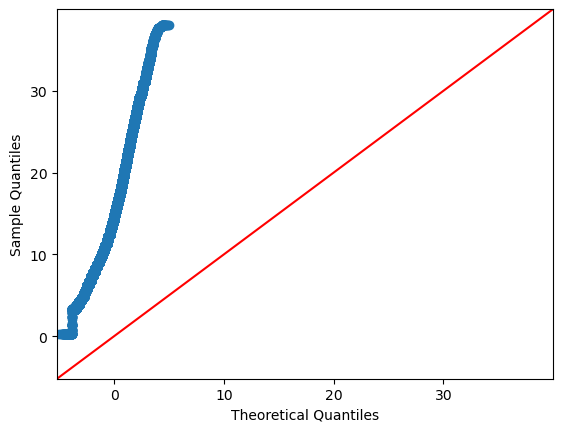

In [148]:
# quantile plot to check if data is normalized
sm.qqplot(df['total_amount'], line = '45')
plt.show()

In [ ]:
card_sample = df[df['payment_type'] == 'Card']['total_amount']
cash_sample = df[df['payment_type'] == 'Cash']['total_amount']

In [ ]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var = False)
print('T Statistic', t_stats, 'p-value', p_value)